## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b>  we will Explore and analyze the data to discover key understandings  such as : 
* What can we learn about different hosts and areas?
* Room Types and Neighbourhood Group
* Price based on the Availability 365 
* Reviews per room_type
* What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df =pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)

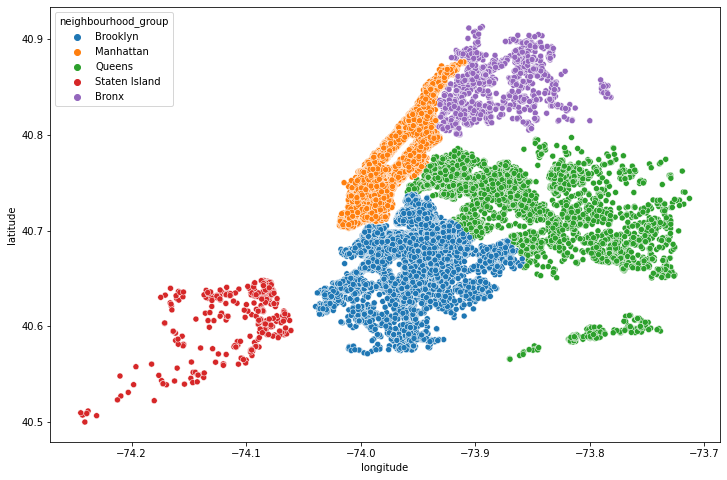

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[longitude],y=df[latitude],hue=df[neighbourhood_group])
plt.show()

In [11]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

* What can we learn about different hosts and areas?

In [43]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [39]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

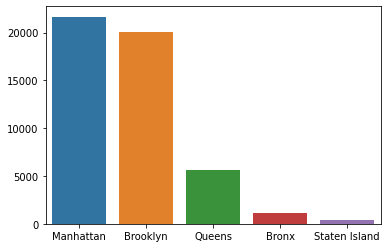

In [41]:
sns.barplot(x=df['neighbourhood_group'].value_counts().index,y=df['neighbourhood_group'].value_counts().values)

In [40]:
df1 =df.groupby(['host_id','host_name','neighbourhood_group', 'neighbourhood']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
df1

,host_id,host_name,neighbourhood_group,neighbourhood,count
35431,219517861,Sonder (NYC),Manhattan,Financial District,218
9944,7503643,Vida,Brooklyn,Greenpoint,52
13074,12243051,Sonder,Manhattan,Financial District,51
35434,219517861,Sonder (NYC),Manhattan,Murray Hill,50
30756,120762452,Stanley,Manhattan,Murray Hill,50
...,...,...,...,...,...
13589,13454974,Michelle,Manhattan,Midtown,1
13587,13451102,Ronnie,Manhattan,Upper West Side,1
13585,13440686,Samuel,Brooklyn,Bedford-Stuyvesant,1
13584,13425453,Peter,Brooklyn,Clinton Hill,1


In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

**Room Types and Neighbourhood Group**

* We will first check the distribution of the room type by grouping the data. From the below its clear the Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less, we will still try to uncover as much details as we can.

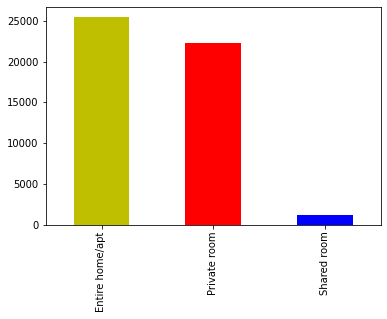

In [ ]:
df['room_type'].value_counts().plot(kind='bar',color=['y','r','b'])
plt.show()

**Top 5 Apartment listings**

In [ ]:
apt = df[df['room_type']=='Entire home/apt']
new_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
new_apt.head(5)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20211,219517861,Sonder (NYC),Financial District,Manhattan,210
6449,7503643,Vida,Greenpoint,Brooklyn,52
8430,12243051,Sonder,Financial District,Manhattan,51
20214,219517861,Sonder (NYC),Murray Hill,Manhattan,50
19900,205031545,Red Awning,Midtown,Manhattan,49


In [ ]:
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(5)

,host_id,host_name,neighbourhood,neighbourhood_group,private
15261,190921808,John,Hell's Kitchen,Manhattan,44
14025,137358866,Kazuya,Woodside,Queens,35
16301,238321374,Eyal,Upper West Side,Manhattan,32
15984,224414117,Gabriel,Hell's Kitchen,Manhattan,30
16035,226410657,Nina,Bedford-Stuyvesant,Brooklyn,26


In [ ]:
shared_room = df[df['room_type']=='Shared room']
shared_room = shared_room.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
shared_room.head(5)

,host_id,host_name,neighbourhood,neighbourhood_group,shared
339,39528519,Max,Lower East Side,Manhattan,23
529,119669058,Melissa,Bedford-Stuyvesant,Brooklyn,18
651,201015598,Anchor,Bedford-Stuyvesant,Brooklyn,17
618,175730239,Baboucarr,Sunnyside,Queens,10
663,209386156,Abraham,East Harlem,Manhattan,9


* Exploration of Neighbourhood Group

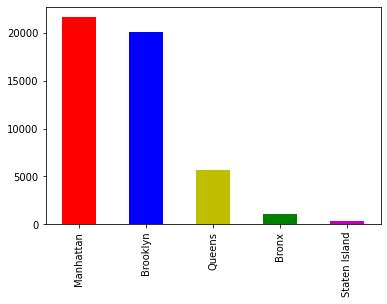

In [ ]:
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

 * From the above it looks like Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

* Let's have a quick summary of the price data. In according to the summary statistics it is clear that the Price ranges from  0− 180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

* We also plot a boxplot to understand how the data is spread out for high ranges for the price irrespective of region.

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b138dcc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b138e9990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b138ee990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b138f6190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b139143d0>,
  <matplotlib.lines.Line2D at 0x7f5b138e9950>]}

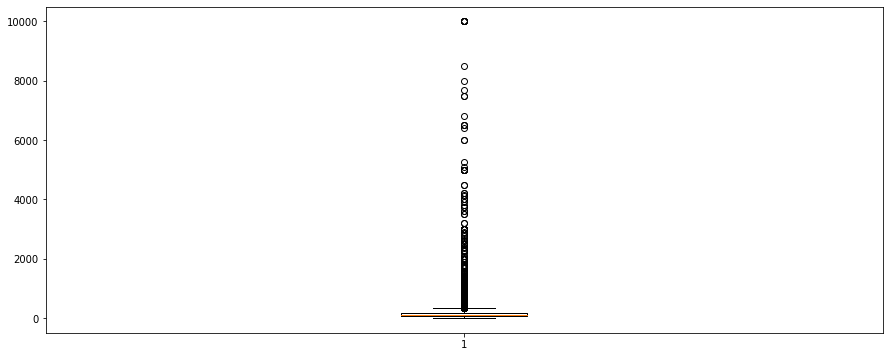

In [ ]:
plt.figure(figsize=(15,6))
plt.boxplot(df['price'])

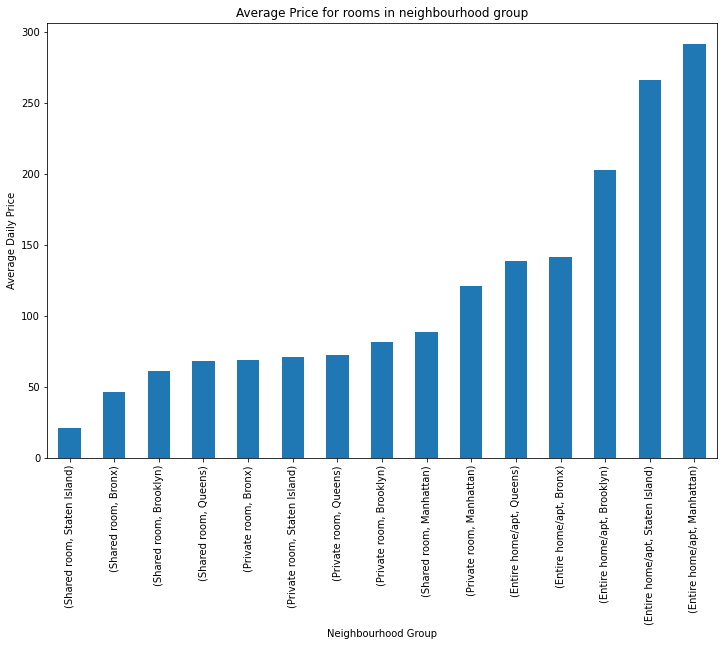

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
df.head()
plt.figure(figsize=(12,8))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

Top 20 most expensive locality in Airbnb listing are :


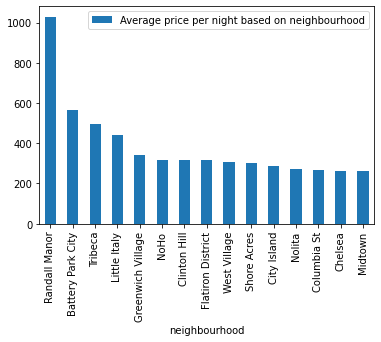

,Average price per night based on neighbourhood
neighbourhood,
Randall Manor,1029.400000
Battery Park City,563.629630
Tribeca,496.309524
Little Italy,441.950000
Greenwich Village,342.710526
NoHo,318.777778
Clinton Hill,317.073394
Flatiron District,315.400000
West Village,305.440000


In [ ]:
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


**Expensive Neighbourhood**

* Till so far we have checked on the location group, but we have not came across each neighbourhood. This is very much important in terms of price to understand which locality has the highest price margin in terms of night being spend by traveller. Let's dig further to understand further.

* So we will now plot the most expensive neighbourhood, and we will plot only Top 15 neighbourhood and Bottom 15 with respect to average price. This will help a traveller to choose the appropriate neighbourhood based on his budget.

* So according to the below plot Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Bull's head locality is the least expensive to stay.

In [ ]:
df.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    837
Williamsburg          792
Harlem                713
Bushwick              655
Hell's Kitchen        578
Upper West Side       479
East Village          434
Upper East Side       425
Crown Heights         375
Midtown               369
Name: neighbourhood, dtype: int64

Least expensive neighbourhood according to Airbnb listing are


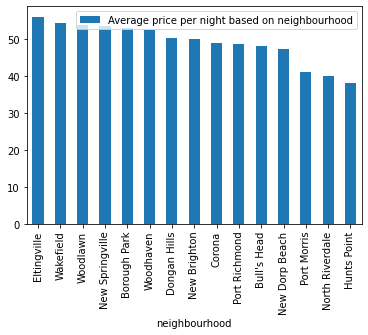

,Average price per night based on neighbourhood
neighbourhood,
Eltingville,56.000000
Wakefield,54.190476
Woodlawn,53.833333
New Springville,53.333333
Borough Park,52.943662
Woodhaven,52.391304
Dongan Hills,50.333333
New Brighton,50.000000
Corona,48.891892


In [ ]:
print('Least expensive neighbourhood according to Airbnb listing are')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

**Most number of locality listed**

* We will now try to figure out how many number of neighbourhood has been posted based on the count. We can see Williamsburg has most number of listing count where as Fort Wadesworth has one of the least listing i.e 1.

* I have listed below the listing of top 15 as well as least 15 based on the neighbourhood.

* If we recall this neighbourhood is one of the highest stay based on price so this can be one of the reason that the price is increased due to the less number of listing.

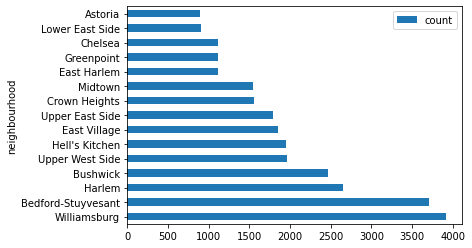

,count
neighbourhood,
Williamsburg,3919
Bedford-Stuyvesant,3714
Harlem,2656
Bushwick,2464
Upper West Side,1970
Hell's Kitchen,1955
East Village,1853
Upper East Side,1797
Crown Heights,1563


In [51]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
print('\n')
pd.DataFrame(df5.head(15))


Least Listing number of count


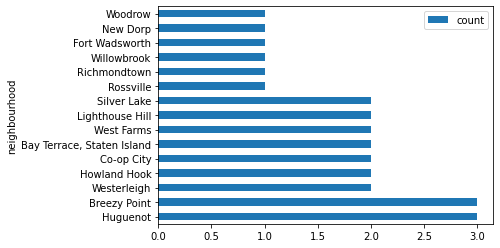

,count
neighbourhood,
Huguenot,3
Breezy Point,3
Westerleigh,2
Howland Hook,2
Co-op City,2
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2


In [52]:

print('Least Listing number of count')
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
print('\n')
pd.DataFrame(df5.tail(15))

**Location and Review Score** 

* Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. So we will try to figure out the review , how each neighbourhood is doing in respect to review. Since there is a limited data with review we will try to figure out as much as we can.

* First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

* So according to the below plot, Brooklyn got most review in comparison to Manhattan and that is an interesting find. Also Staten Island which is cheaper has less review than the other neighbourhood group. We cannot proceed further to understand why is that case since we have a limited data.

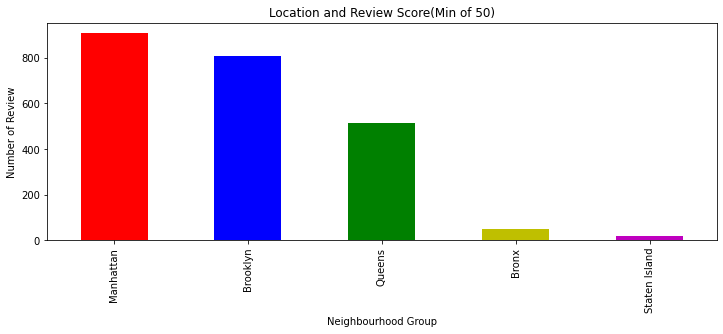

 Count of Review v/s neighbourhood group


,neighbourhood_group
Manhattan,909
Brooklyn,808
Queens,515
Bronx,48
Staten Island,20


In [ ]:
fig = plt.figure(figsize=(12,4))
review_50 = df[df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

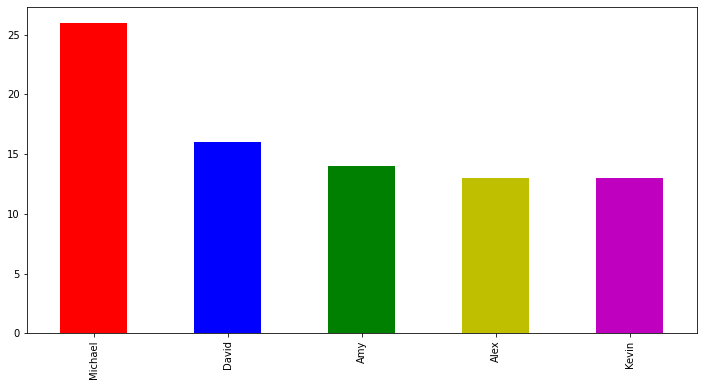

In [ ]:
plt.figure(figsize=(12,6))

df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])

**Plot Price based on the Availability 365**

* We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

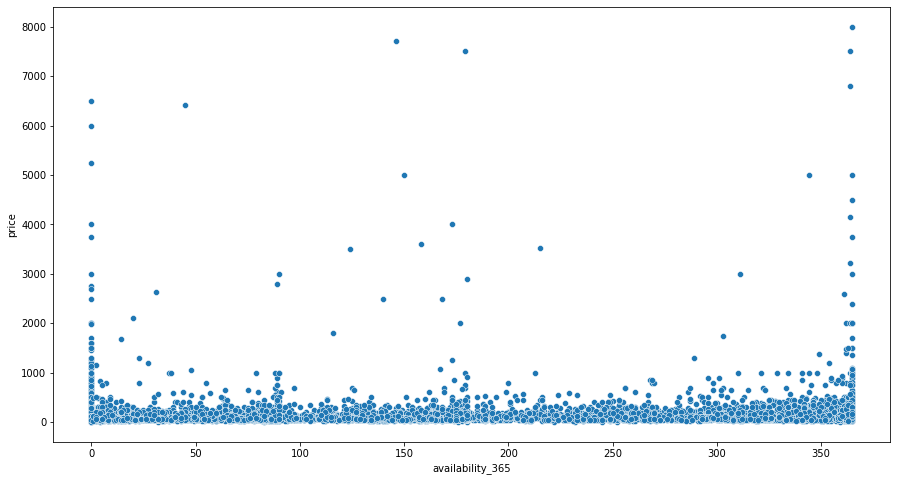

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

In [ ]:
df6 = review_50.groupby(['neighbourhood_group','room_type']).mean()
df6 = df6.drop(['id','host_id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood_group')

latitude  longitude       price  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt  40.841709 -73.870244  101.588235   
                    Private room     40.858904 -73.881149   51.733333   
                    Shared room      40.840340 -73.830070   20.000000   
Brooklyn            Entire home/apt  40.681620 -73.951104  155.193662   
                    Private room     40.682023 -73.948564   69.978218   
                    Shared room      40.659616 -73.942556   37.315789   
Manhattan           Entire home/apt  40.761216 -73.974668  195.446108   
                    Private room     40.773995 -73.970327   97.618147   
                    Shared room      40.767663 -73.976092   65.043478   
Queens              Entire home/apt  40.719568 -73.843579  111.034483   
                    Private room     40.731967 -73.855748   60.052778   
                    Shared room      40.716721 -73.844449   40.000000   
Staten Island       Entire home/apt  40.612332 -74.094628  113.363636   
                    Private room     40.601793 -74.114761   59.000000   

                                     minimum_nights  number_of_reviews  \
neighbourhood_group room_type                                            
Bronx               Entire home/apt             1.0         127.176471   
                    Private room                1.0         124.833333   
                    Shared room                 1.0         116.000000   
Brooklyn            Entire home/apt             1.0         119.683099   
                    Private room                1.0         118.231683   
                    Shared room                 1.0         108.736842   
Manhattan           Entire home/apt             1.0         120.913174   
                    Private room                1.0         130.839319   
                    Shared room                 1.0          90.282609   
Queens              Entire home/apt             1.0         121.889655   
                    Private room                1.0         127.691667   
                    Shared room                 1.0         128.400000   
Staten Island       Entire home/apt             1.0          93.636364   
                    Private room                1.0          81.666667   

                                     availability_365  
neighbourhood_group room_type                          
Bronx               Entire home/apt        265.352941  
                    Private room           172.866667  
                    Shared room              5.000000  
Brooklyn            Entire home/apt        175.968310  
                    Private room           157.506931  
                    Shared room            153.526316  
Manhattan           Entire home/apt        167.242515  
                    Private room           153.357278  
                    Shared room            174.369565  
Queens              Entire home/apt        183.731034  
                    Private room           192.625000  
                    Shared room            185.900000  
Staten Island       Entire home/apt        247.454545  
                    Private room           291.777778

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
17,7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,2019-07-01,2.12,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,40.74477,-73.87727,Private room,45,1,0,NaN,0.00,5,172
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,0.00,3,365
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,0.00,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,0.00,2,163


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_availability = df.groupby(['room_type','neighbourhood_group'])[['availability_365']].mean()
df_availability

availability_365
room_type       neighbourhood_group                  
Entire home/apt Bronx                      146.317647
                Brooklyn                    98.933135
                Manhattan                   91.565159
                Queens                     140.221374
                Staten Island              194.589744
Private room    Bronx                      174.909483
                Brooklyn                    96.359032
                Manhattan                  107.243970
                Queens                     160.225535
                Staten Island              207.802817
Shared room     Bronx                      159.266667
                Brooklyn                   159.612121
                Manhattan                  136.159011
                Queens                     177.981982
                Staten Island                5.000000

**Reviews per room_type**

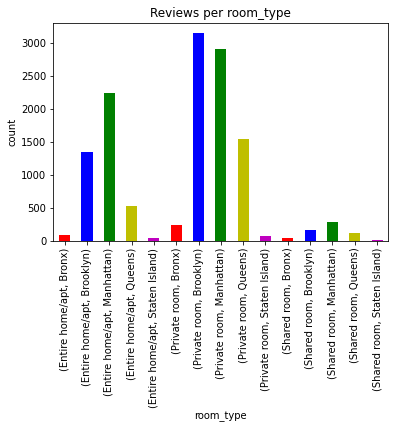

In [ ]:
df_reviews = df.groupby(['room_type','neighbourhood_group'])[['number_of_reviews']].size()
df_reviews.plot(kind='bar',color=['r','b','g','y','m'])
plt.xlabel('room_type')
plt.title("Reviews per room_type")
plt.ylabel('count')
plt.show()